# Non-Linear Regression

In [1]:
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [2]:
# ================================================================
# Load feature and label matrices from text files
# ================================================================

# --- Load the feature matrix (X) from "Dataset.txt" ---
with open("Dataset.txt", "r") as file:
    matrix = []
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        elements = line.split()  # Split the line by spaces
        row_matrix = [float(element) for element in elements]  # Convert each value to float
        matrix.append(row_matrix)  # Append the processed row to the matrix

X = np.array(matrix)  # Convert to NumPy array representing the dataset features


# --- Load the label matrix (y) from "Label.txt" ---
with open("Label.txt", "r") as file:
    matrix = []
    for line in file:
        line = line.strip()  # Remove leading/trailing whitespace
        elements = line.split()  # Split the line by spaces
        row_matrix = [float(element) for element in elements]  # Convert each value to float
        matrix.append(row_matrix)  # Append the processed row to the matrix

y = np.array(matrix)  # Convert to NumPy array representing supervised learning labels


X1=X[0:1000000]
y1=y[0:1000000]

# ================================================================
# Nonlinear Multivariate Regression Test
# ================================================================

# --- Define the degree of polynomial transformation ---
degree = 3  # Polynomial order for feature expansion

# --- Generate polynomial and interaction features ---
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X1)

# --- Initialize the linear regression model ---
model = LinearRegression()

# --- Train the model on polynomial-transformed data ---
model.fit(X_poly, y1)

# --- Predict outputs using the trained model ---
y_pred = model.predict(X_poly)

# --- Retrieve the names of the generated polynomial features ---
# Use descriptive input feature names for clarity (x, y, z)
feature_names = poly_features.get_feature_names_out(
    input_features=["x", "y", "z"]
)

# --- Display the polynomial feature names ---
print("Polynomial feature names:")
print(feature_names)


# --- Retrieve model coefficients ---
coefficients_L = model.coef_
print("Model coefficients:")
print(coefficients_L)


Polynomial feature names:
['1' 'x' 'y' 'z' 'x^2' 'x y' 'x z' 'y^2' 'y z' 'z^2' 'x^3' 'x^2 y' 'x^2 z'
 'x y^2' 'x y z' 'x z^2' 'y^3' 'y^2 z' 'y z^2' 'z^3']
Model coefficients:
[[ 0.00000000e+00  1.00186840e+00  1.15699198e-03  8.52576534e-05
  -3.02801110e-05 -2.91745988e-04  3.64504424e-04  2.41164436e-04
  -2.76637492e-04  1.13107461e-04 -9.46568352e-03 -6.02240893e-04
  -7.64920039e-05  4.11006885e-04  1.32413266e-04 -5.79080553e-04
  -2.59087426e-04 -1.81011447e-04 -2.68615395e-04  2.38873085e-04]
 [ 0.00000000e+00  1.17679883e-03  1.00083977e+00  9.69891092e-04
   2.47214960e-05 -7.12063251e-05  1.77496945e-05  4.24235652e-05
   2.56920680e-04 -1.14587019e-04 -1.34005295e-04  1.04827653e-04
   9.26855489e-05 -4.86305713e-04 -1.01235352e-04 -1.86419217e-04
  -9.36115402e-03 -2.79671354e-04  3.07833351e-04  2.27510156e-05]
 [ 0.00000000e+00  1.76848912e-04  7.41041580e-04  1.00203762e+00
  -3.02141373e-06  3.68271907e-05  1.31467787e-04 -1.85326416e-04
   3.21169491e-05  4.66889187e-

In [3]:
# ================================================================
# Thresholding method with coefficient update
# ================================================================

threshold = 5e-4  # Threshold value

# Apply threshold: set coefficients below threshold to zero
coefficients_thresholded = np.where(np.abs(coefficients_L) < threshold, 0, coefficients_L)

# Convert thresholded coefficients to sparse matrix
coefficients_sparse = csr_matrix(coefficients_thresholded)

# Display sparse coefficient matrix
print("Sparse coefficient matrix:")
print(coefficients_sparse.toarray())

# Store the sparse coefficients matrix as A
A = coefficients_sparse.toarray()

Sparse coefficient matrix:
[[ 0.00000000e+00  1.00186840e+00  1.15699198e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.46568352e-03 -6.02240893e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.79080553e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.17679883e-03  1.00083977e+00  9.69891092e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -9.36115402e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  7.41041580e-04  1.00203762e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  5.54848017e-

In [4]:
# --- True/reference coefficient matrix C (3x20) ---
C = np.zeros((3, 20))
C[0, 1], C[0, 2],  C[0,10] = 1.002, 0.001, -0.01
C[1, 1], C[1, 2],  C[1, 3], C[1,16] = 0.001, 1.001, 0.001, -0.01
C[2, 2], C[2, 3],  C[2,19] = 0.001, 1.002, -0.01
print("C (reference):\n", C)
print("A (estimated):\n", A)

# --- Coefficient error (vectorized) ---
diff = A - C
error = np.sqrt(np.sum(diff**2))
error_pc = np.sqrt(np.sum(diff**2) / 20)
print("Reference magnitude ~", 1e-3)
print("Total error:", error)
print("Error per coefficient:", error_pc)

# --- Polynomial extension: (x,y,z) -> 20 features ---
def extension(x, y, z):
    return np.array([
        0,
        x, y, z,
        x**2, x*y, x*z, y**2, y*z, z**2,
        x**3, x**2*y, x**2*z, x*y**2, x*y*z, x*z**2,
        y**3, y**2*z, z**2*y, z**3
    ])

# Build extended X_new, y_new
X_new = np.vstack([extension(*X[i, :3]) for i in range(len(X))])
y_new = np.vstack([extension(*y[i, :3]) for i in range(len(X))])

# --- MultiTask LASSO CV (sparse coefficients) ---
lasso_cv = MultiTaskLassoCV(alphas=np.logspace(-5.8, -5.2, 100), cv=5)
lasso_cv.fit(X_new, y)                  # train
best_alpha = lasso_cv.alpha_            # best alpha
y_pred = lasso_cv.predict(X_new)        # predict
mse = mean_squared_error(y, y_pred)     # MSE
coefficients = lasso_cv.coef_           # sparse coef matrix

print("Best alpha:", best_alpha)
print("Mean squared error:", mse)
print("LASSO coefficients:\n", coefficients)


C (reference):
 [[ 0.000e+00  1.002e+00  1.000e-03  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e-02  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00]
 [ 0.000e+00  1.000e-03  1.001e+00  1.000e-03  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00 -1.000e-02  0.000e+00
   0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  1.000e-03  1.002e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00  0.000e+00
   0.000e+00 -1.000e-02]]
A (estimated):
 [[ 0.00000000e+00  1.00186840e+00  1.15699198e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -9.46568352e-03 -6.02240893e-04
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -5.79080553e-04
   0.00000000e+0

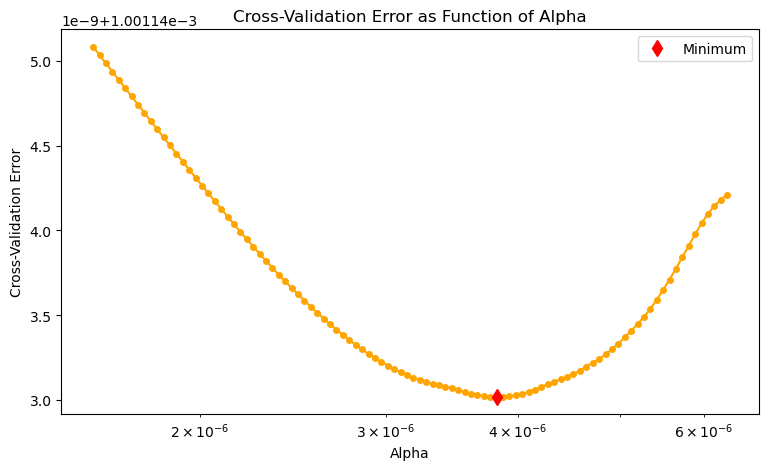

In [9]:
# ================================================================
# Cross-Validation Error as a Function of Alpha
# ================================================================

# Retrieve alpha values and cross-validation errors
alphas = lasso_cv.alphas_
cv_errors = np.mean(lasso_cv.mse_path_, axis=1)

# Find the index and value of the minimum cross-validation error
min_error_idx = np.argmin(cv_errors)
min_error_alpha = alphas[min_error_idx]
min_error = cv_errors[min_error_idx]

# Plot the cross-validation errors vs alpha
plt.figure(figsize=(9, 5))
plt.plot(alphas, cv_errors, marker="o", markersize=4, color="orange")
plt.plot(min_error_alpha, min_error, 'd', markersize=8, label='Minimum', color="red")
plt.xscale('log')
# plt.yscale('log')  # Uncomment if you want both axes in log scale
plt.xlabel('Alpha')
plt.ylabel('Cross-Validation Error')
plt.title('Cross-Validation Error as Function of Alpha')
plt.legend()
# plt.grid(True)
# plt.savefig('OptimalLambda_try.png', bbox_inches='tight', dpi=300, transparent=True)
plt.show()
